# Physics 404/604

## Computational Physics 

# Partial Differential Equations (PDEs)

\begin{equation}
A\frac{\partial^2 U(x,y)}{\partial x^2}+2B\frac{\partial^2 U(x,y)}{\partial x\partial y}+C\frac{\partial^2 U(x,y)}{\partial y^2}+D\frac{\partial U(x,y)}{\partial x}+E\frac{\partial U(x,y)}{\partial y}=F
\end{equation}

|*     Elliptic     * | *      Parabolic   * | *   Hyperbolic   * |
|----|----|----| 
|$d=AC-B^2>0$|$d=AC-B^2=0$|$d=AC-B^2<0$|
|$\nabla^2 U(x) = -4\pi\rho(x)$|$\nabla^2 U(\mathbf{x},t) =a \partial U/\partial t$|$\nabla^2 U(\mathbf{x},t)=c^{-2}\partial^2 U/\partial t^2\mbox{}$  |
| Poisson's | Heat | Wave|

Elliptic equation: second-order derivatives of all the variables, but having the same sign when placed on the same side  
Parabolic equation: a first-order derivative in one variable and a second-order derivative in the other  
Hyperbolic equation: equation: second-order derivatives of all the variables, but having the opposite signs when placed on the same side  

To uniquely determine the solution, needs special boundary/initial condition.

# Solving hyperbolic equations

A typical example of the hyperbolic equation is the advection equation
\begin{equation}
\frac{\partial U}{\partial t}+v\frac{\partial U}{\partial x}=0
\end{equation}

When $v$ is a constant, the solution is simply the advection 
\begin{equation}
U(x,t)=U(x - v t,0)
\end{equation}

Unfortunately, traditional forward time centered space method (FTCS) which is
used for solving the diffusion equation cannot be applied here. 
It is unconditionally unstable.

Thus, new method is needed.

## Central Difference Forward Time (Unstable)

If we approximate time-derivative using spatial average at old time
\begin{equation}
U_{t}=\frac{U_{j}^{n+1}-U_{j}^n}{\Delta t}
\end{equation}
We have
\begin{equation}
U_{j}^{n+1}=U_{j}^n-\frac{v\Delta t}{2\Delta x}(U_{j+1}^n-U_{j-1}^n)
\end{equation}

Question :

A fluid with a step velocity profile is advecting to the right at the speed of 1 m/s. Calculate the fluid evolution for 0.5 second.

t =  0.10000999999999392
t =  0.20000000000005924
t =  0.30000000000015925
t =  0.40000000000025926
t =  0.5000000000003593
Done.


/Users/zhzhu/miniconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


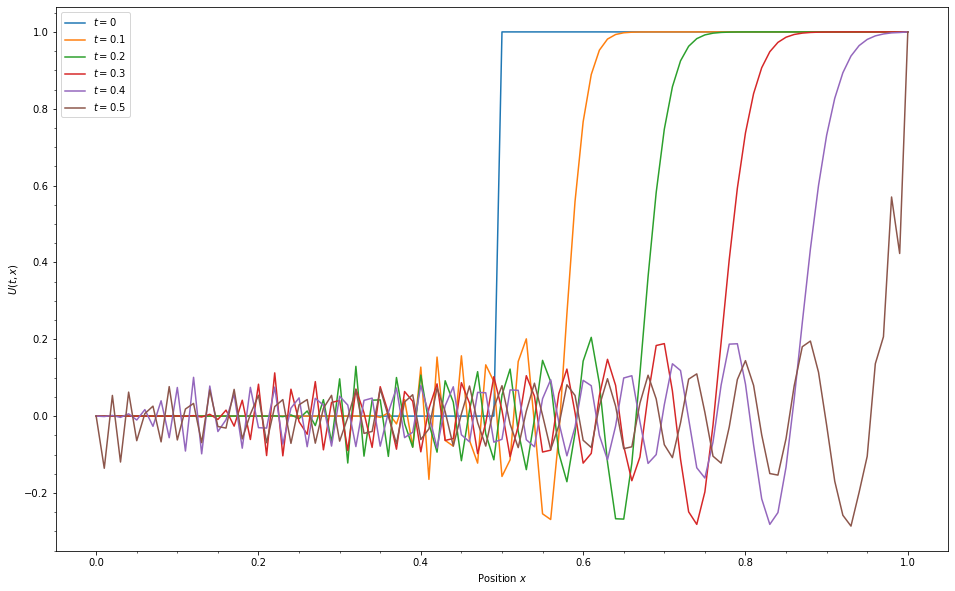

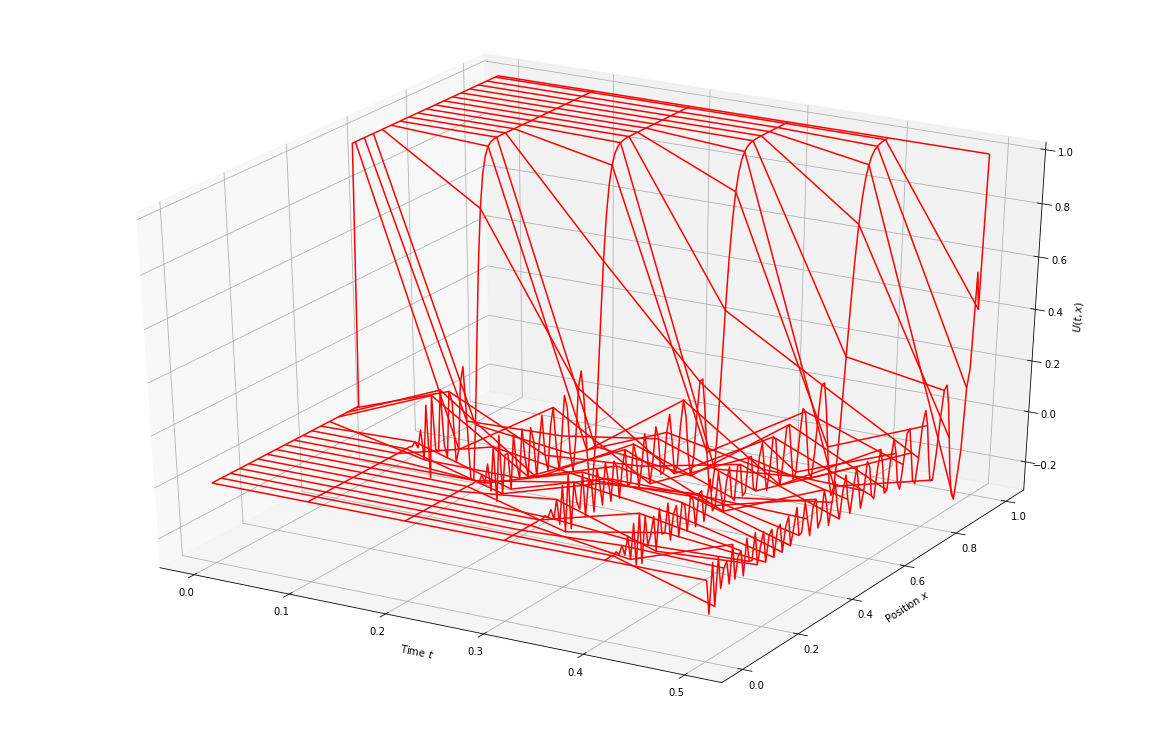

In [1]:
# CDFT
# Advection equation for a step initial condition

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
vel = 1.0     # advection velocity
L = 1.0       # domain size
Nx = 101      # number of grid points (including boundary)
tend = 0.5    # end time
dtout = 0.1   # time interval for outputs

# Set up the grid.
x = np.linspace(0, L, Nx)
dx = L / (Nx - 1)
dt = 0.001 * dx / abs(vel)  # experiment with the size of the time step

# Give the initial profile.
t = 0.0
U = np.zeros(Nx,)
U[np.where(x < L/2)] = 0.0
U[np.where(x >= L/2)] = 1.0

# Prepare for 3D outputs
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):  # Q: why not range(Nx)?
        U[ix] =Uold[ix]... # Task: implement CDFT here.
        
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Once you are done, experiment with the size of the time step dt.  Does it become more accurate with smaller dt?

## Lax Friedrichs Difference Form

If we approximate time-derivative using spatial average at old time
\begin{equation}
U_t \simeq \frac{U_{j}^{n+1}-(U_{j+1}^n+U_{j-1}^n)/2}{\Delta t}
\end{equation}
We have
\begin{equation}
U_{j}^{n+1} = \frac{U_{j+1}^n+U_{j-1}^n}{2}-\frac{v\Delta t}{2\Delta x}(U_{j+1}^n-U_{j-1}^n)
\end{equation}
This algorithm is stable is $\Delta t<\Delta x/v$ (CFL condition)

t =  0.10999999999999999
t =  0.20000000000000004
t =  0.3000000000000001
t =  0.4000000000000002
t =  0.5000000000000002
Done.


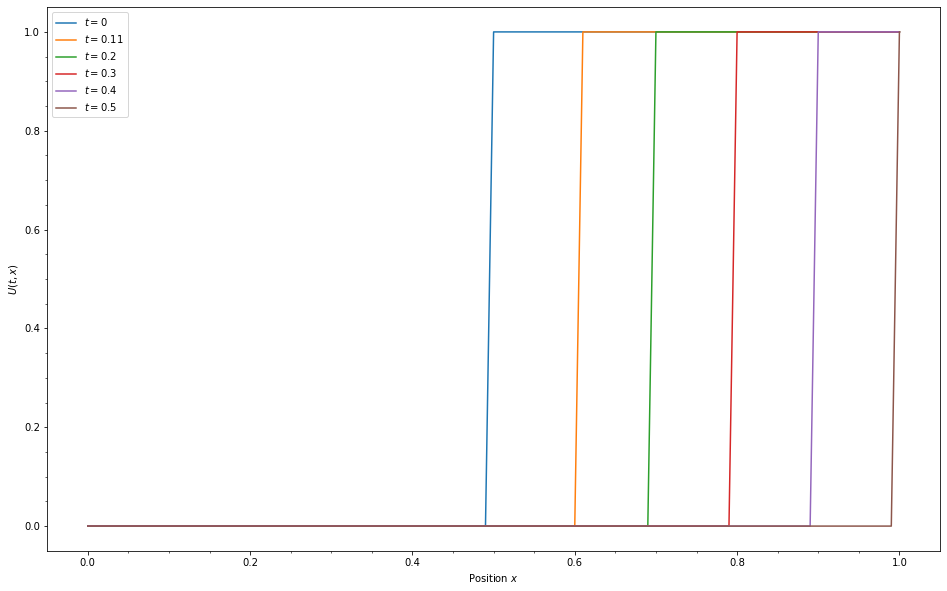

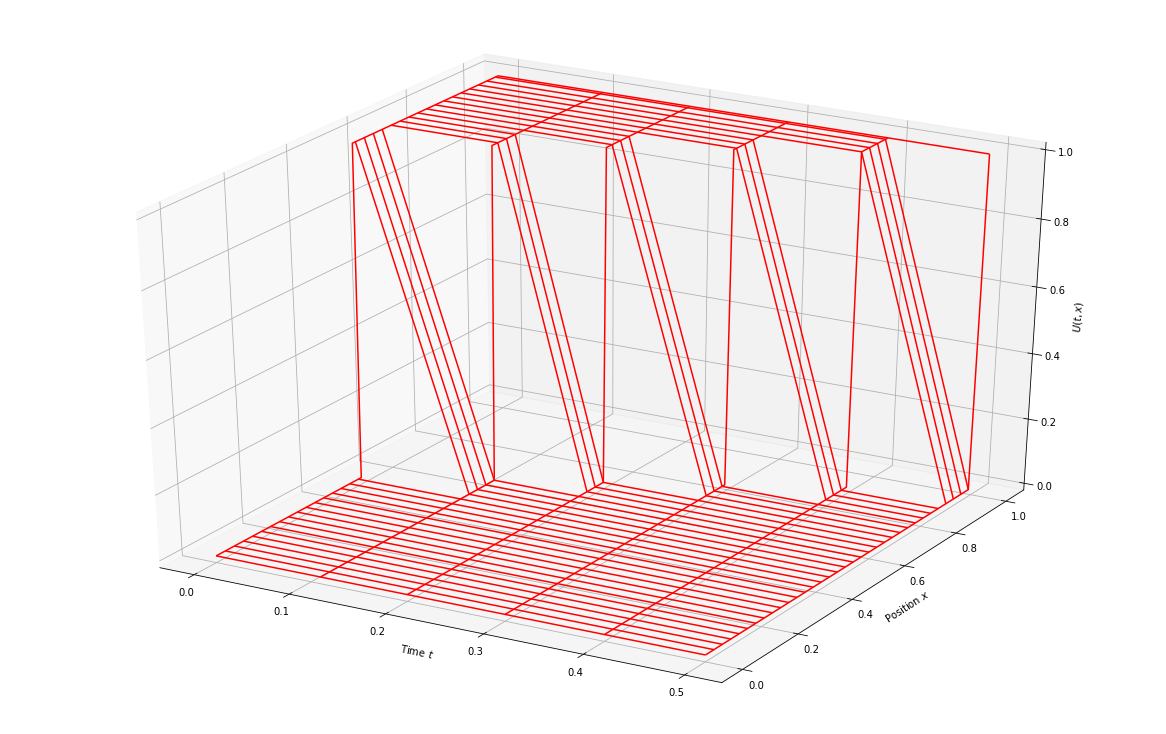

In [6]:
# Lax-Friedrichs

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
vel = 1.0     # advection velocity
L = 1.0       # domain size
Nx = 101      # number of grid points (including boundary)
tend = 0.5    # end time
dtout = 0.1   # time interval for outputs

# Set up the grid.
x = np.linspace(0, L, Nx)
dx = L / (Nx - 1)
dt = 1.* dx / abs(vel)  # experiment with the size of the time step

# Give the initial profile.
t = 0.0
U = np.zeros(Nx,)
U[np.where(x < L/2)] = 0.0
U[np.where(x >= L/2)] = 1.0

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    for ix in range(1, Nx - 1):
        # Task: implement Lax-Friedrichs here using Uold[ix-1], Uold[ix], Uold[ix+1].
        U[ix]= ...
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

How well does this method work?  Compare the solution with your expectation.

Then again experiment with the size of the time step.  What happens when you tune down the time step?  On the other hand, what happens when the CFL condition is violated?

From these experiments, what would you conclude about the best size of the time step?

## Upwind Method

Recall the solution is just original profile displaced by $v t$.
So the information is propagating from left to right if $v > 0$. The central difference
thus should use information from the upstream. 

The spatial derivative is approximated with the one-sided difference
\begin{eqnarray}
U_{x}=\frac{U_{j}^n-U_{j-1}^n}{\Delta x} \qquad if \qquad v>0\\
U_{x}=\frac{U_{j+1}^n-U_{j}^n}{\Delta x} \qquad if \qquad v<0\\
\end{eqnarray}
It has the same stability requirement as the Lax-Friedrichs method
\begin{equation}
U_j^{n+1}=U_j^n-(v\Delta t) U_{x}
\end{equation}

t =  0.10000000000000184
t =  0.20009999999999428
t =  0.30009999999998327
t =  0.40009999999997226
t =  0.5000999999999612
Done.


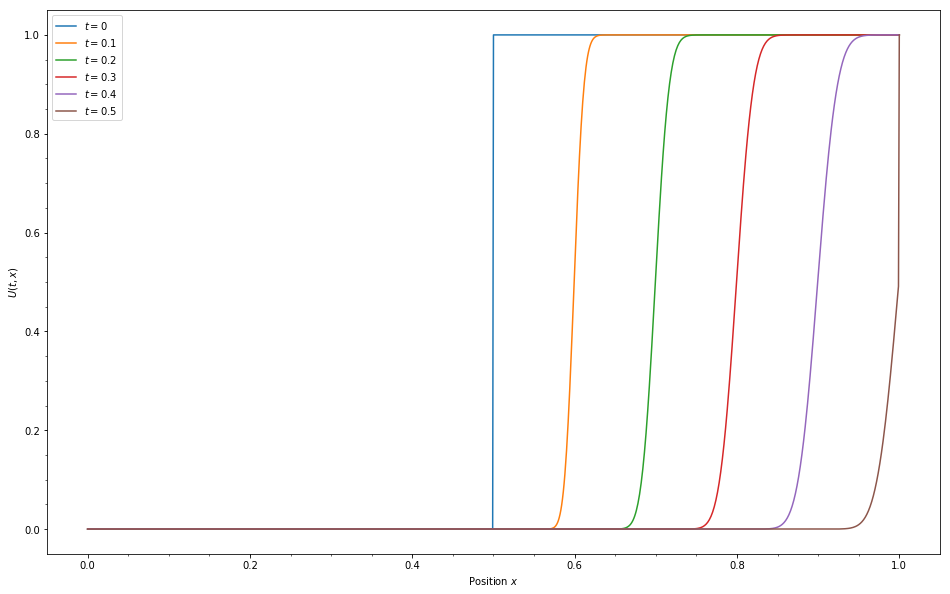

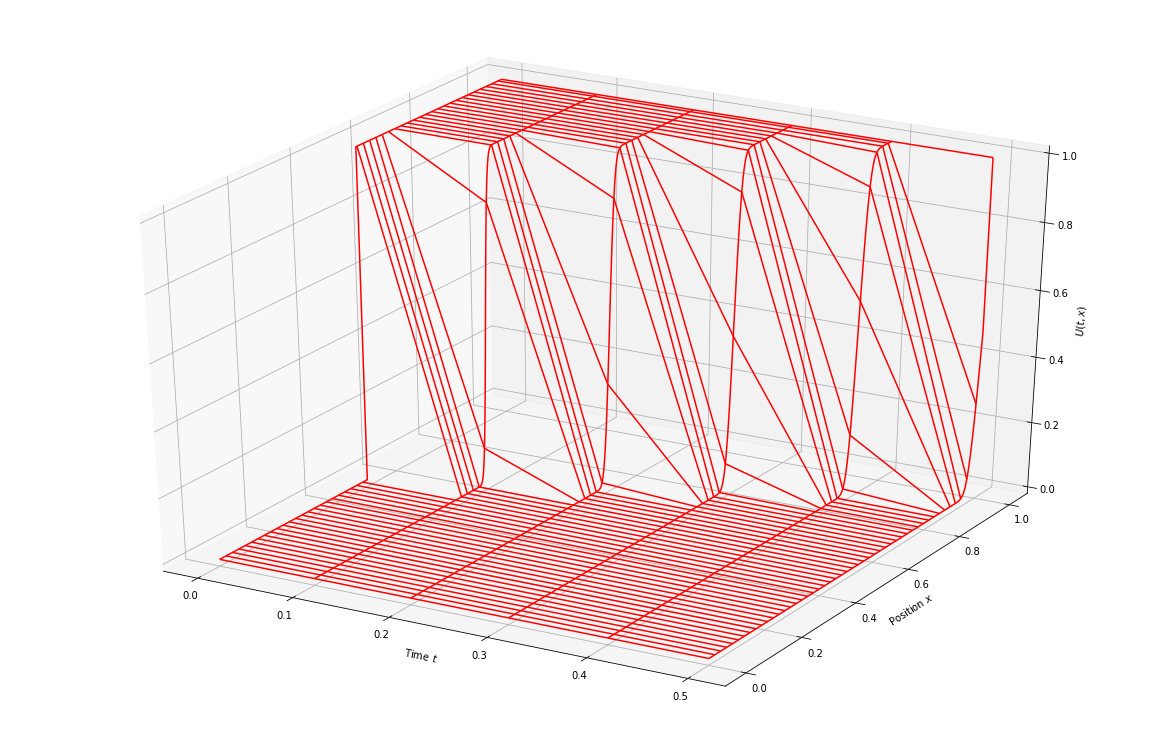

In [7]:
# Upwind method

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
vel = 1.0     # advection velocity
L = 1.0       # domain size
Nx = 1001      # number of grid points (including boundary)
tend = 0.5    # end time
dtout = 0.1   # time interval for outputs

# Set up the grid.
x = np.linspace(0, L, Nx)
dx = L / (Nx - 1)
dt = 0.1 * dx / abs(vel)  # experiment with the size of the time step

# Give the initial profile.
t = 0.0
U = np.zeros(Nx,)
U[np.where(x < L/2)] = 0.0
U[np.where(x >= L/2)] = 1.0

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    if vel > 0:
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]- # Task: implement upwind method here.
            
    else:
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]- # Task: implement upwind method here.
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

Compare the upwind method with Lax-Friedrichs method.  Which one performs better?

Again experiment with the size of the time step and make an assessment on the dependence of the solution on time step.

Be sure to change the sign of the velocity and see if you still get reasonable results.

## Lax-Wendroff  (optional)

Develop a second-order formula using Taylor series:
\begin{equation}
U_{j}^{n+1}=U_{j}^n-\frac{v\Delta t}{2\Delta x}(U_{j+1}^n-U_{j-1}^n)+\frac{v^2\Delta t^2}{2\Delta x^2}(U_{j+1}^n-2U_{j}^n+U_{j-1}^n)
\end{equation}

t =  0.10000000000000007
t =  0.20000000000000015
t =  0.3000000000000002
t =  0.4000000000000003
t =  0.5000000000000003
Done.


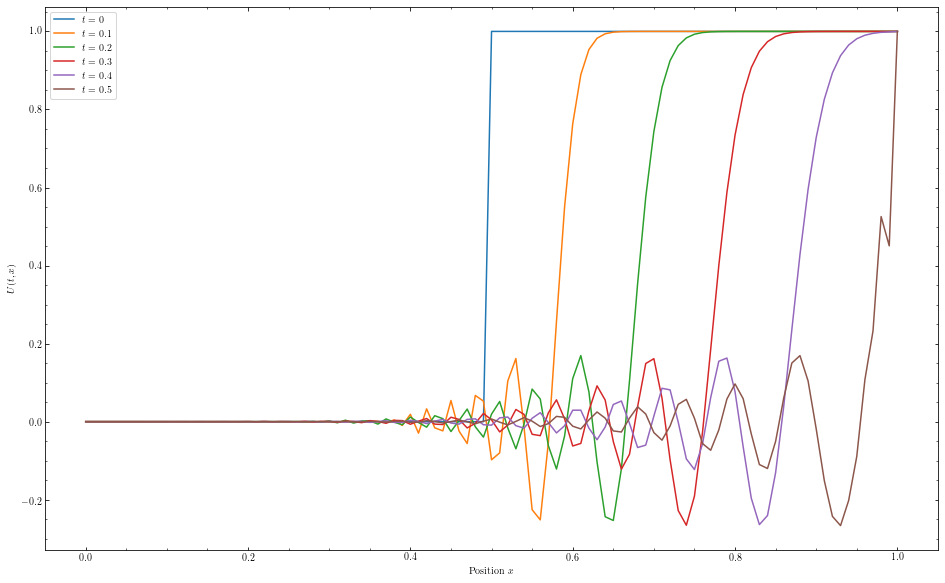

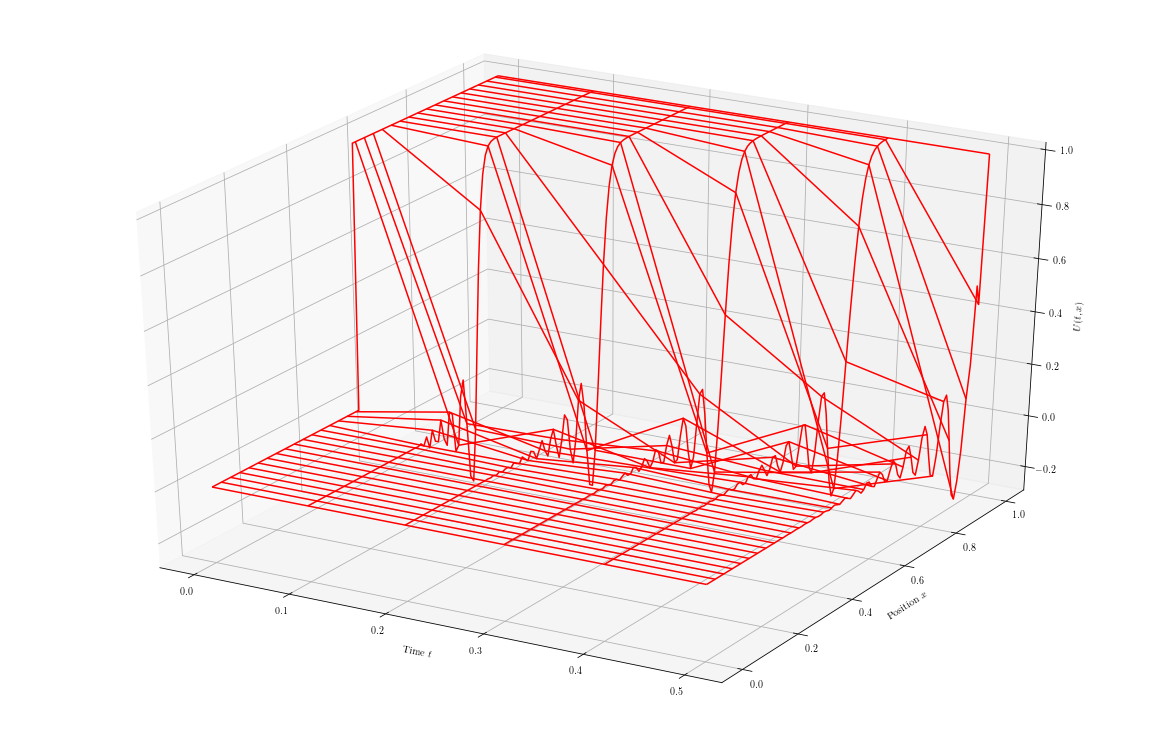

In [4]:
# Lax-Wendroff

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
vel = 1.0     # advection velocity
L = 1.0       # domain size
Nx = 101      # number of grid points (including boundary)
tend = 0.5    # end time
dtout = 0.1   # time interval for outputs

# Set up the grid.
x = np.linspace(0, L, Nx)
dx = L / (Nx - 1)
dt = 0.1 * dx / abs(vel)  # experiment with the size of the time step

# Give the initial profile.
t = 0.0
U = np.zeros(Nx,)
U[np.where(x < L/2)] = 0.0
U[np.where(x >= L/2)] = 1.0

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    c = vel * dt / dx
    for ix in range (1, Nx - 1):
        U[ix] = Uold[ix] - 0.5 * c *(Uold[ix+1] - Uold[ix-1]) + 0.5 * c**2 * (Uold[ix+1] - 2*Uold[ix] + Uold[ix-1])
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig3D = plt.figure(figsize=(16,10))
ax3D = Axes3D(fig3D)
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

This method supposedly has a higher order of accuracy than all previous methods.  Do you get more accurate results?

## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


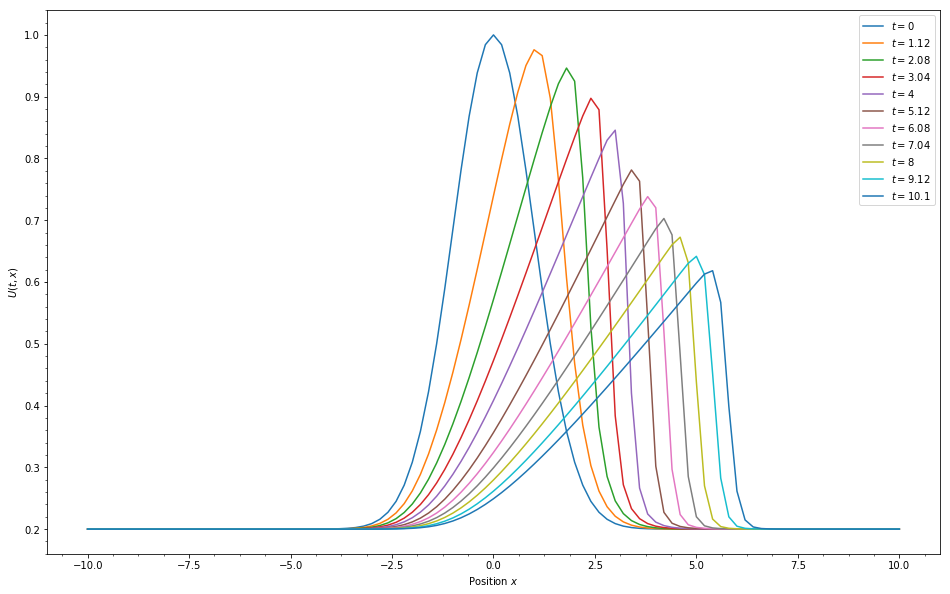

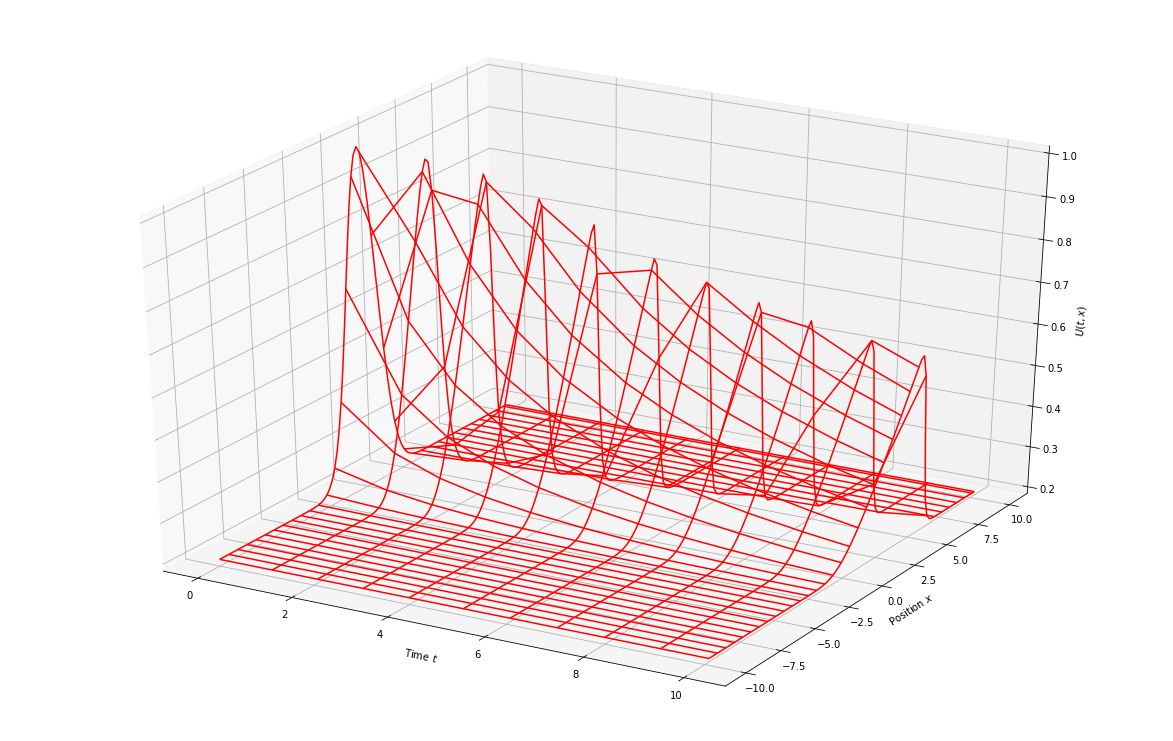

In [3]:
# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
